<a href="https://colab.research.google.com/github/NaGa-ImO/DLfromZERO_julia/blob/main/DLfromZERO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia"'

In [ ]:
!julia -e 'using Pkg; pkg"add Plots; add PyPlot; add MLDatasets; add Images; add PyCall; add HTTP"'

上記をshift+enterで実行後、「ランタイム」->「ランタイムのタイプを変更」->「保存」を押してください。

In [1]:
versioninfo()

Julia Version 1.6.1
Commit 6aaedecc44 (2021-04-23 05:59 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)


以上はcolabでjuliaを使うための設定。

以下が「ゼロから作るDeep Learning」（4章）のコード（julia）のみ

# 4章　ニューラルネットワークの学習

## 4.2  損失関数

### 4.2.1 2乗和誤差

In [ ]:
mean_squared_error(y, t) = 0.5 * sum(abs2.(y-t))

mean_squared_error (generic function with 1 method)

In [ ]:
#　正解は2
t = [0 0 1 0 0 0 0 0 0 0]

# 例1
y = [0.1 0.05 0.6 0.0 0.05 0.1 0.0 0.1 0.0 0.0]
error1 = mean_squared_error(y, t)
println(error1)

# 例2
 y = [0.1 0.05 0.1 0.0 0.05 0.1 0.0 0.6 0.0 0.0]
 error2 = mean_squared_error(y, t)
 println(error2)

0.09750000000000003
0.5974999999999999


### 4.2.2 交差エントロピー誤差

In [ ]:
cross_entropy_error(y, t) = - sum(t.*log.(y .+ 1e-7))

cross_entropy_error (generic function with 1 method)

In [ ]:
#　正解は2
t = [0 0 1 0 0 0 0 0 0 0]

# 例1
y = [0.1 0.05 0.6 0.0 0.05 0.1 0.0 0.1 0.0 0.0]
error1 = cross_entropy_error(y, t)
println(error1)
println(size(y)[2])

# 例2
 y = [0.1 0.05 0.1 0.0 0.05 0.1 0.0 0.6 0.0 0.0]
 error2 = cross_entropy_error(y, t)
 println(error2)

0.510825457099338
10
2.302584092994546


### 4.2.3 ミニバッチ学習

In [ ]:
# MLDatasetsパッケージのMNISTSデータセットを使う
using MLDatasets

# 訓練用画像データと教師データをロード
x_train, t_train = MNIST.traindata()

println(size(x_train))
println(size(t_train))

(28, 28, 60000)
(60000,)


In [ ]:
train_size = size(train_x)[3]
batch_size = 10

batch_mask = rand(1 : train_size, batch_size)

x_batch = x_train[:, :, batch_mask]
t_batch = t_train[batch_mask]
size(t_batch)

(10,)

教師データはラベルとして与えられる。（one-hotではない）

### 4.2.4 [バッチ対応版]交差エントロピー誤差の実装

In [ ]:
cross_entropy_error(y, t) = - sum(log.(y[i, t[i]+1] for i in 1:size(y)[1])) / size(y)[1]

cross_entropy_error (generic function with 1 method)

## 4.3 数値微分

### 4.3.1 微分

In [2]:
numerical_diff(f, x) = (f(x + 1e-4) - f( x - 1e-4)) / (2*1e-4)

numerical_diff (generic function with 1 method)

### 4.3.2 数値微分の例

In [23]:
function_1(x) = 0.01x^2 +0.1x

function_1 (generic function with 1 method)

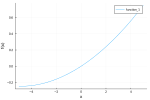

In [25]:
using Plots
plot(function_1, xlabel="x", ylabel="f(x)", label="function_1" )

In [26]:
diffx5 = numerical_diff(function_1, 5)
println(diffx5)

diffx10 = numerical_diff(function_1, 10)
println(diffx10)

0.1999999999990898
0.2999999999986347


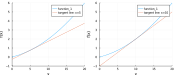

In [28]:
tangent(a) = (x -> numerical_diff(function_1, a)*(x-a) + function_1(a) ) # x=aでの接線の関数


p1 = plot(function_1, xlabel="x", ylabel="f(x)", label="function_1", xlim=(0, 20), ylim=(-1,6) ); plot!(tangent(5), label="tangent line: x=5")
p2 = plot(function_1, xlabel="x", ylabel="f(x)", label="function_1", xlim=(0, 20), ylim=(-1,6) ); plot!(tangent(10), label="tangent line: x=10")
plot(p1, p2, layout=(1,2), size=(700,300))  #上記プロットを一気に1×2レイアウトでプロット

### 4.3.3 偏微分

In [7]:
function_2(x) = x[1]^2 + x[2]^2

function_2 (generic function with 1 method)

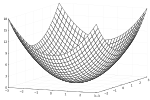

In [8]:
x = -3:0.2:3 
y = x
z = [function_2([a b]) for a in x, b in y]
plot(wireframe(x,y,z))

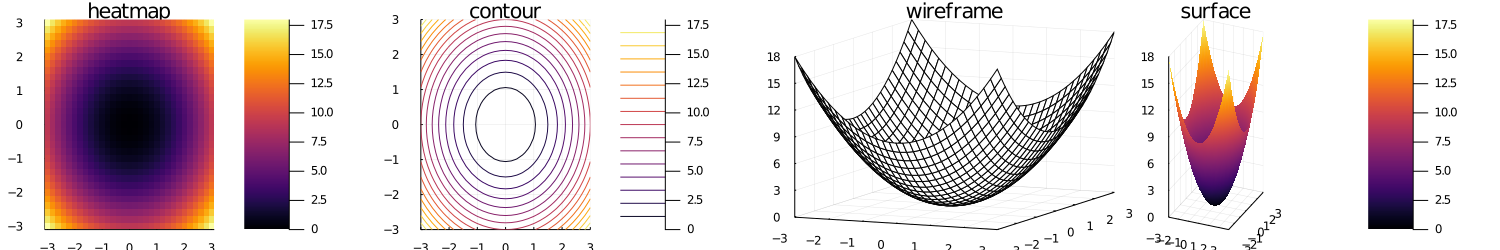

In [9]:
#おまけ　各プロット
p1=heatmap(x,y,z,title="heatmap")                        #ヒートマップ heatmap(x,y,2次元データ,...)
p2=contour(x,y,z,title="contour")                        #コンター図   contour(xデータ,y,z,...)
p3=wireframe(x,y,z,title="wireframe")                    #3Dのワイヤーフレーム表記
p4=surface(x,y,z,title="surface")                        #3Dの曲面表示
plot(p1,p2,p3,p4,layout=(1,4),size=(1500,250),fmt=:png)  #1×4表記 (少し重たくなるので、後述のフォーマットpng)

In [10]:
# 問１
function_tmp1(x0) = x0^2 + 4^2
println(numerical_diff(function_tmp1, 3))

# 問2
function_tmp2(x1) = 3^2 + x1^2
println(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


## 4.4 勾配

In [11]:
function numerical_gradient(f, x)
    h = 1e-4
    grad = zeros(size(x))

    for idx in 1:length(x)
        tmp_val = x[idx]
        # f(x_idx+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2h)
        x[idx] = tmp_val
    end

    return grad
end

numerical_gradient (generic function with 1 method)

In [12]:
println(numerical_gradient(function_2, [3.0 4.0]))
println(numerical_gradient(function_2, [0.0 2.0]))
println(numerical_gradient(function_2, [3.0 0.0]))

[6.00000000000378 7.999999999999119]
[0.0 4.000000000004]
[6.000000000012662 0.0]


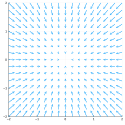

In [13]:
x = -2:0.25:2
y = x 
X = repeat(x, inner=(length(y))) # xの個々の要素を、yの要素数の回数分、繰り返す
Y = repeat(y, outer=(length(x))) # y全体を、xの要素数の回数分、繰り返す

z = [numerical_gradient(function_2, [a b]) for a in x, b in y]

scale =  -0.05
u = [z[i][2] for i in 1:length(X)] .*scale
v = [z[i][1] for i in 1:length(Y)] .*scale

quiver(X, Y, quiver=(u ,v), xlim=(-2,2), ylim=(-2,2), size=(500,500))

#println(size(u))

### 4.4.1 勾配法

In [14]:
function gradient_descent(f, init_x, lr, step_num)
    x =init_x

    for i in 1:step_num
        grad = numerical_gradient(f, x)
        x -=  grad .* lr
    end

    return x
end

gradient_descent (generic function with 1 method)

In [20]:
function_2(x) = x[1]^2 + x[2]^2

#パラメータたち
f = function_2
init_x = [-3.0 4.0]
lr = 0.1
step_num = 100

gradient_descent(f, init_x , lr, step_num)

1×2 Matrix{Float64}:
 -6.11111e-10  8.14814e-10

In [19]:
lr = 10.0

gradient_descent(f, init_x , lr, step_num)

1×2 Matrix{Float64}:
 -2.58984e13  -1.29525e12

In [21]:
lr = 1e-10

gradient_descent(f, init_x , lr, step_num)

1×2 Matrix{Float64}:
 -3.0  4.0

### 4.4.2 ニューラルネットワークに対する勾配

In [4]:
cross_entropy_error(y, t) = - sum(t.*log.(y .+ 1e-7))
softmax(a) = exp.(a.- maximum(a))/sum(exp.(a.- maximum(a)))

function numerical_gradient(f, x)
    h = 1e-4
    grad = zeros(size(x))

    for idx in 1:length(x)
        tmp_val = x[idx]
        # f(x_idx+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2h)
        x[idx] = tmp_val
    end

    return grad
end

numerical_gradient (generic function with 1 method)

pythonのclassの概念を移植するのに次のページを参考にした。  
https://www.hellocybernetics.tech/entry/2021/05/01/113224#クラスの書き方

In [1]:
mutable struct simpleNet
    W
    predict
    loss

    function simpleNet()
        self = new()
        self.W = rand(2, 3)
        self.predict = (x -> x*self.W)
        self.loss = ((x, t) -> cross_entropy_error(softmax(self.predict(x)), t))
        return self
    end
end

SyntaxError: ignored

In [ ]:
net = simpleNet()
println(net.W)
#net.W = [0.47355232 0.9977393 0.84668094; 0.85557411 0.03563661 0.69422093]

x = [0.6 0.9]
p = net.predict(x)
println(p)
println(argmax(p)[2])

t = [0 0 1]
println(net.loss(x, t))

In [11]:
f(W) = net.loss(x, t) #lambdaなんて使わん

dW = numerical_gradient(f, net.W)
println(dW)

[0.1559620292002073 0.30521050909171343 -0.46117253822641757; 0.23394304386359366 0.45781576363701504 -0.6917588072752334]


## 4.5 学習アルゴリズムの実装

### 4.5.1 2層ニューラルネットワークのクラス

参照

https://zenn.dev/skypenguins/articles/b44bff12c0a728

In [243]:
module TwoLayerNet

    export twoLayerNet, init_twoLayerNet, predict, loss, accuracy, numerical_gradient!

    mutable struct twoLayerNet{T}
        params::Dict{T}
        grads::Dict{T}
    end

    sigmoid(x) = 1/(1 + exp(-x))
    softmax(a) = exp.(a.- maximum(a))/sum(exp.(a.- maximum(a)))
    cross_entropy_error(y, t) = - sum(log.(y[i, t[i]+1] for i in 1:size(y)[1])) / size(y)[1]

    function numerical_gradient(f, x)
        h = 1e-4
        grad = zeros(size(x))

        for idx in 1:length(x)
          tmp_val = x[idx]
            # f(x_idx+h)の計算
            x[idx] = tmp_val + h
            fxh1 = f(x)

            x[idx] = tmp_val - h
            fxh2 = f(x)

            grad[idx] = (fxh1 - fxh2)/(2h)
            x[idx] = tmp_val
        end

        return grad
    end

    function twoLayerNet(input_size::Int, hidden_size::Int, output_size::Int ; weight_init_std=0.01)
        params = Dict()
        params["W1"] = weight_init_std .* rand(input_size, hidden_size)
        params["b1"] = weight_init_std .* rand(hidden_size)
        params["W2"] = weight_init_std .* rand(hidden_size, output_size)
        params["b2"] = weight_init_std .* rand(output_size)

        grads = Dict()
        return twoLayerNet(params, grads)
    end

    function predict(self::twoLayerNet, x)
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = transpose(W1) * x .+ b1  #hidden * input
        z1 = sigmoid.(a1)
        a2 = transpose(W2) * z1 .+ b2   # output * input
        return softmax(a2)
    end

    function loss(self::twoLayerNet, x, t)
        y = predict(self, x)
        return cross_entropy_error(y,t)
    end

    function accuracy(self::twoLayerNet, x, t)
        y = predict(self, x)
        y = [findmax(y[:, j])[2]-1 for j in 1:size(t)[1]]
        accuracy = sum(y .== t) / size(t)[1]
        return accuracy
    end

    function numerical_gradient!(self::twoLayerNet, x, t)
        loss_W(W) = loss(self, x, t)
        # self.W1を操作してloss_Wで渡されているself.W1の値を間接的に操作している。
        self.grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        self.grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        self.grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        self.grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return self
    end

end

Main.TwoLayerNet

In [244]:
using .TwoLayerNet

net = TwoLayerNet.twoLayerNet(784, 100, 10)
println(size(net.params["W1"]))
println(size(net.params["b1"]))
println(size(net.params["W2"]))
println(size(net.params["b2"]))
println(typeof(net.params))
println(typeof(net.grads))

(784, 100)
(100,)
(100, 10)
(10,)
Dict{Any, Any}
Dict{Any, Any}


In [246]:
x = rand(784, 10000)
t = rand(0:9, 10000)

acc = TwoLayerNet.accuracy(net, x,t)

0.0979

In [247]:
x = rand(784, 100)
t = rand(0:9, 100)

y = TwoLayerNet.loss(net, x, t)
#size(y)

6.907431981825792

In [ ]:
x = rand(784, 100)
t = rand(0:9, 100)
grads = TwoLayerNet.numerical_gradient!(net, x, t)

In [ ]:
println(size(net.grads["W1"]))
println(size(net.grads["b1"]))
println(size(net.grads["W2"]))
println(size(net.grads["b2"]))
println(net.grads["W1"])

### 4.5.2 ミニバッチ学習の実装

In [ ]:
# MLDatasetsパッケージのMNISTSデータセットを使う
using MLDatasets

x_train, t_train = MNIST.traindata()
x_test,  t_test  = MNIST.testdata()
x_train = (reshape(x_train, (784, :)))

In [ ]:
train_loss_list = []

# hyper parameter
iters_num = 100
train_size = size(x_train)[2]
batch_size = 100
learning_rate = 0.1

using .TwoLayerNet
network = TwoLayerNet.twoLayerNet(784, 50, 10)

In [ ]:
for i in 1:iters_num
    #ミニバッチの取得
    batch_mask = rand(1:train_size, batch_size)
    x_batch = x_train[ :, batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grads = TwoLayerNet.numerical_gradient!(network, x_batch, t_batch)

    # パラメータの更新
    for key in ["W1", "b1", "W2", "b2"]
        network.params[key]-= learning_rate .* network.grads[key]
    end

    # 学習経過の記録
    loss = TwoLayerNet.loss(network, x_batch, t_batch)
    push!(train_loss_list, loss)
    println("$i : loss = $(loss)")
    
end

In [ ]:
using Plots
plot(train_loss_list, xlabel="iteration", ylabel="loss")

### 4.5.3 テストデータで評価

In [ ]:
# MLDatasetsパッケージのMNISTSデータセットを使う
using MLDatasets

x_train, t_train = MNIST.traindata()
x_test,  t_test  = MNIST.testdata()
x_train = (reshape(x_train, (784, :)))
x_test = (reshape(x_test, (784, :)))

train_loss_list = []
train_acc_list = []
test_acc_list = []

# hyper parameter
iters_num = 100
train_size = size(x_train)[2]
batch_size = 100
learning_rate = 0.1

# 1エポックあたりの繰り返し数
iter_per_epoch = (train_size/batch_size > 1 ? train_size/batch_size : 1)

using .TwoLayerNet
network = TwoLayerNet.twoLayerNet(784, 50, 10)

In [ ]:
for i in 1:iters_num
    #ミニバッチの取得
    batch_mask = rand(1:train_size, batch_size)
    x_batch = x_train[ :, batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grads = TwoLayerNet.numerical_gradient!(network, x_batch, t_batch)

    # パラメータの更新
    for key in ["W1", "b1", "W2", "b2"]
        network.params[key]-= learning_rate .* network.grads[key]
    end

    # 学習経過の記録
    loss = TwoLayerNet.loss(network, x_batch, t_batch)
    push!(train_loss_list, loss)
    println("$i : loss = $(loss)")

    if i%iter_per_epoch == 0
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        push!(train_acc_list, train_acc)
        push!(test_acc_list, test_acc)
        println("train acc, test acc | $(train_acc), $(test_acc)")
    end
    
end

In [ ]:
using Plots
plot(train_acc_list, xlabel="iteration", ylabel="accuracy", label="train acc")
plot!(test_acc_list, label="test acc", linestyle="--")
